In [ ]:
from simulation import generate_rand_matrix,get_neighbors,next_gen,matrix_data_collection,run_game,sample_runs,final_run
from visualization import show_end_state_circle_chart,show_random_sample_runs,show_heat_map,show_initial_percent_alive_ci_avg,show_ci_delta,difference_in_average_ci_percent_alive_groups
from analysis import calc_matrix_size_and_initial_percent_alive_group_stats,required_n_per_group,anova_analysis,cohens_f,sample_v_final_stat_comparison


In [2]:
sample_output = sample_runs(15,max_steps=101)

In [3]:
sample_output.head()

,alive_cells,gen,run,initial_percent_alive,matrix_size,term_reason,last_gen,id
0,5,0,0,0.05,100,steady,3,0-0.05-100
1,4,1,0,0.05,100,steady,3,0-0.05-100
2,4,2,0,0.05,100,steady,3,0-0.05-100
3,4,3,0,0.05,100,steady,3,0-0.05-100
4,5,0,1,0.05,100,dead,1,1-0.05-100


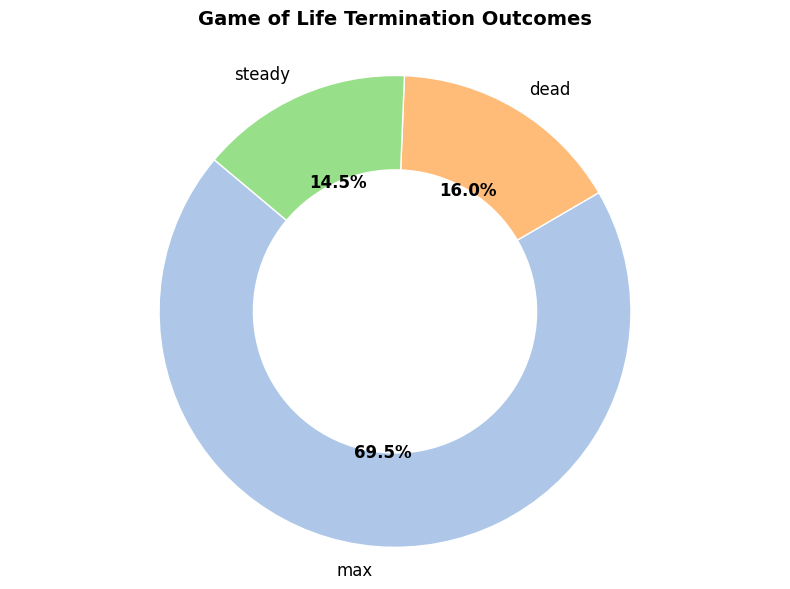

In [4]:
show_end_state_circle_chart(sample_output)

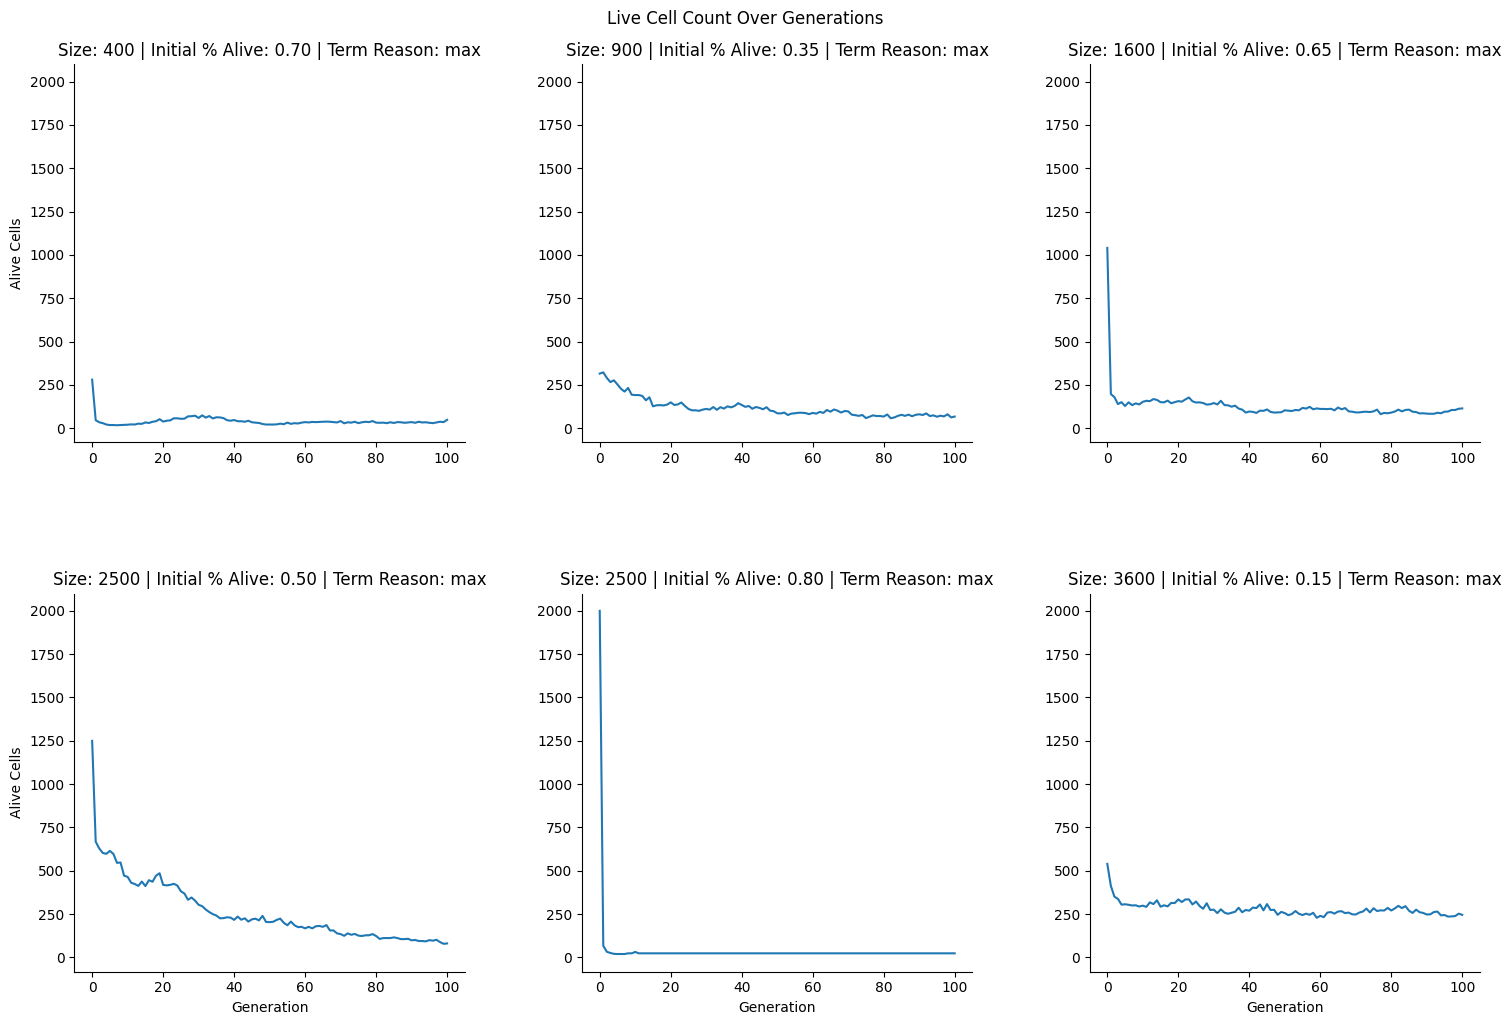

In [5]:
show_random_sample_runs(sample_output)

In [6]:
sample_output_group_stats = calc_matrix_size_and_initial_percent_alive_group_stats(sample_output).sort_values(["ci_95"],ascending=False)
sample_output_group_stats.sort_values(["ci_95"],ascending=False).head(25)

,matrix_size,initial_percent_alive,gen_mean,gen_std,n,gen_standard_error,ci_95
130,4900,0.85,56.200000,48.478567,15,12.517112,26.846535
187,10000,0.85,50.000000,48.429625,15,12.504475,26.819432
52,900,0.75,57.066667,47.522125,15,12.270160,26.316876
76,2500,0.05,36.400000,46.582952,15,12.027667,25.796779
72,1600,0.80,47.733333,45.731306,15,11.807773,25.325153
95,3600,0.05,69.066667,45.291858,15,11.694307,25.081795
2,100,0.15,39.066667,45.046748,15,11.631020,24.946058
110,3600,0.80,60.266667,44.792325,15,11.565329,24.805163
168,8100,0.85,40.400000,44.516129,15,11.494015,24.652210
32,400,0.70,62.800000,43.964596,15,11.351610,24.346782


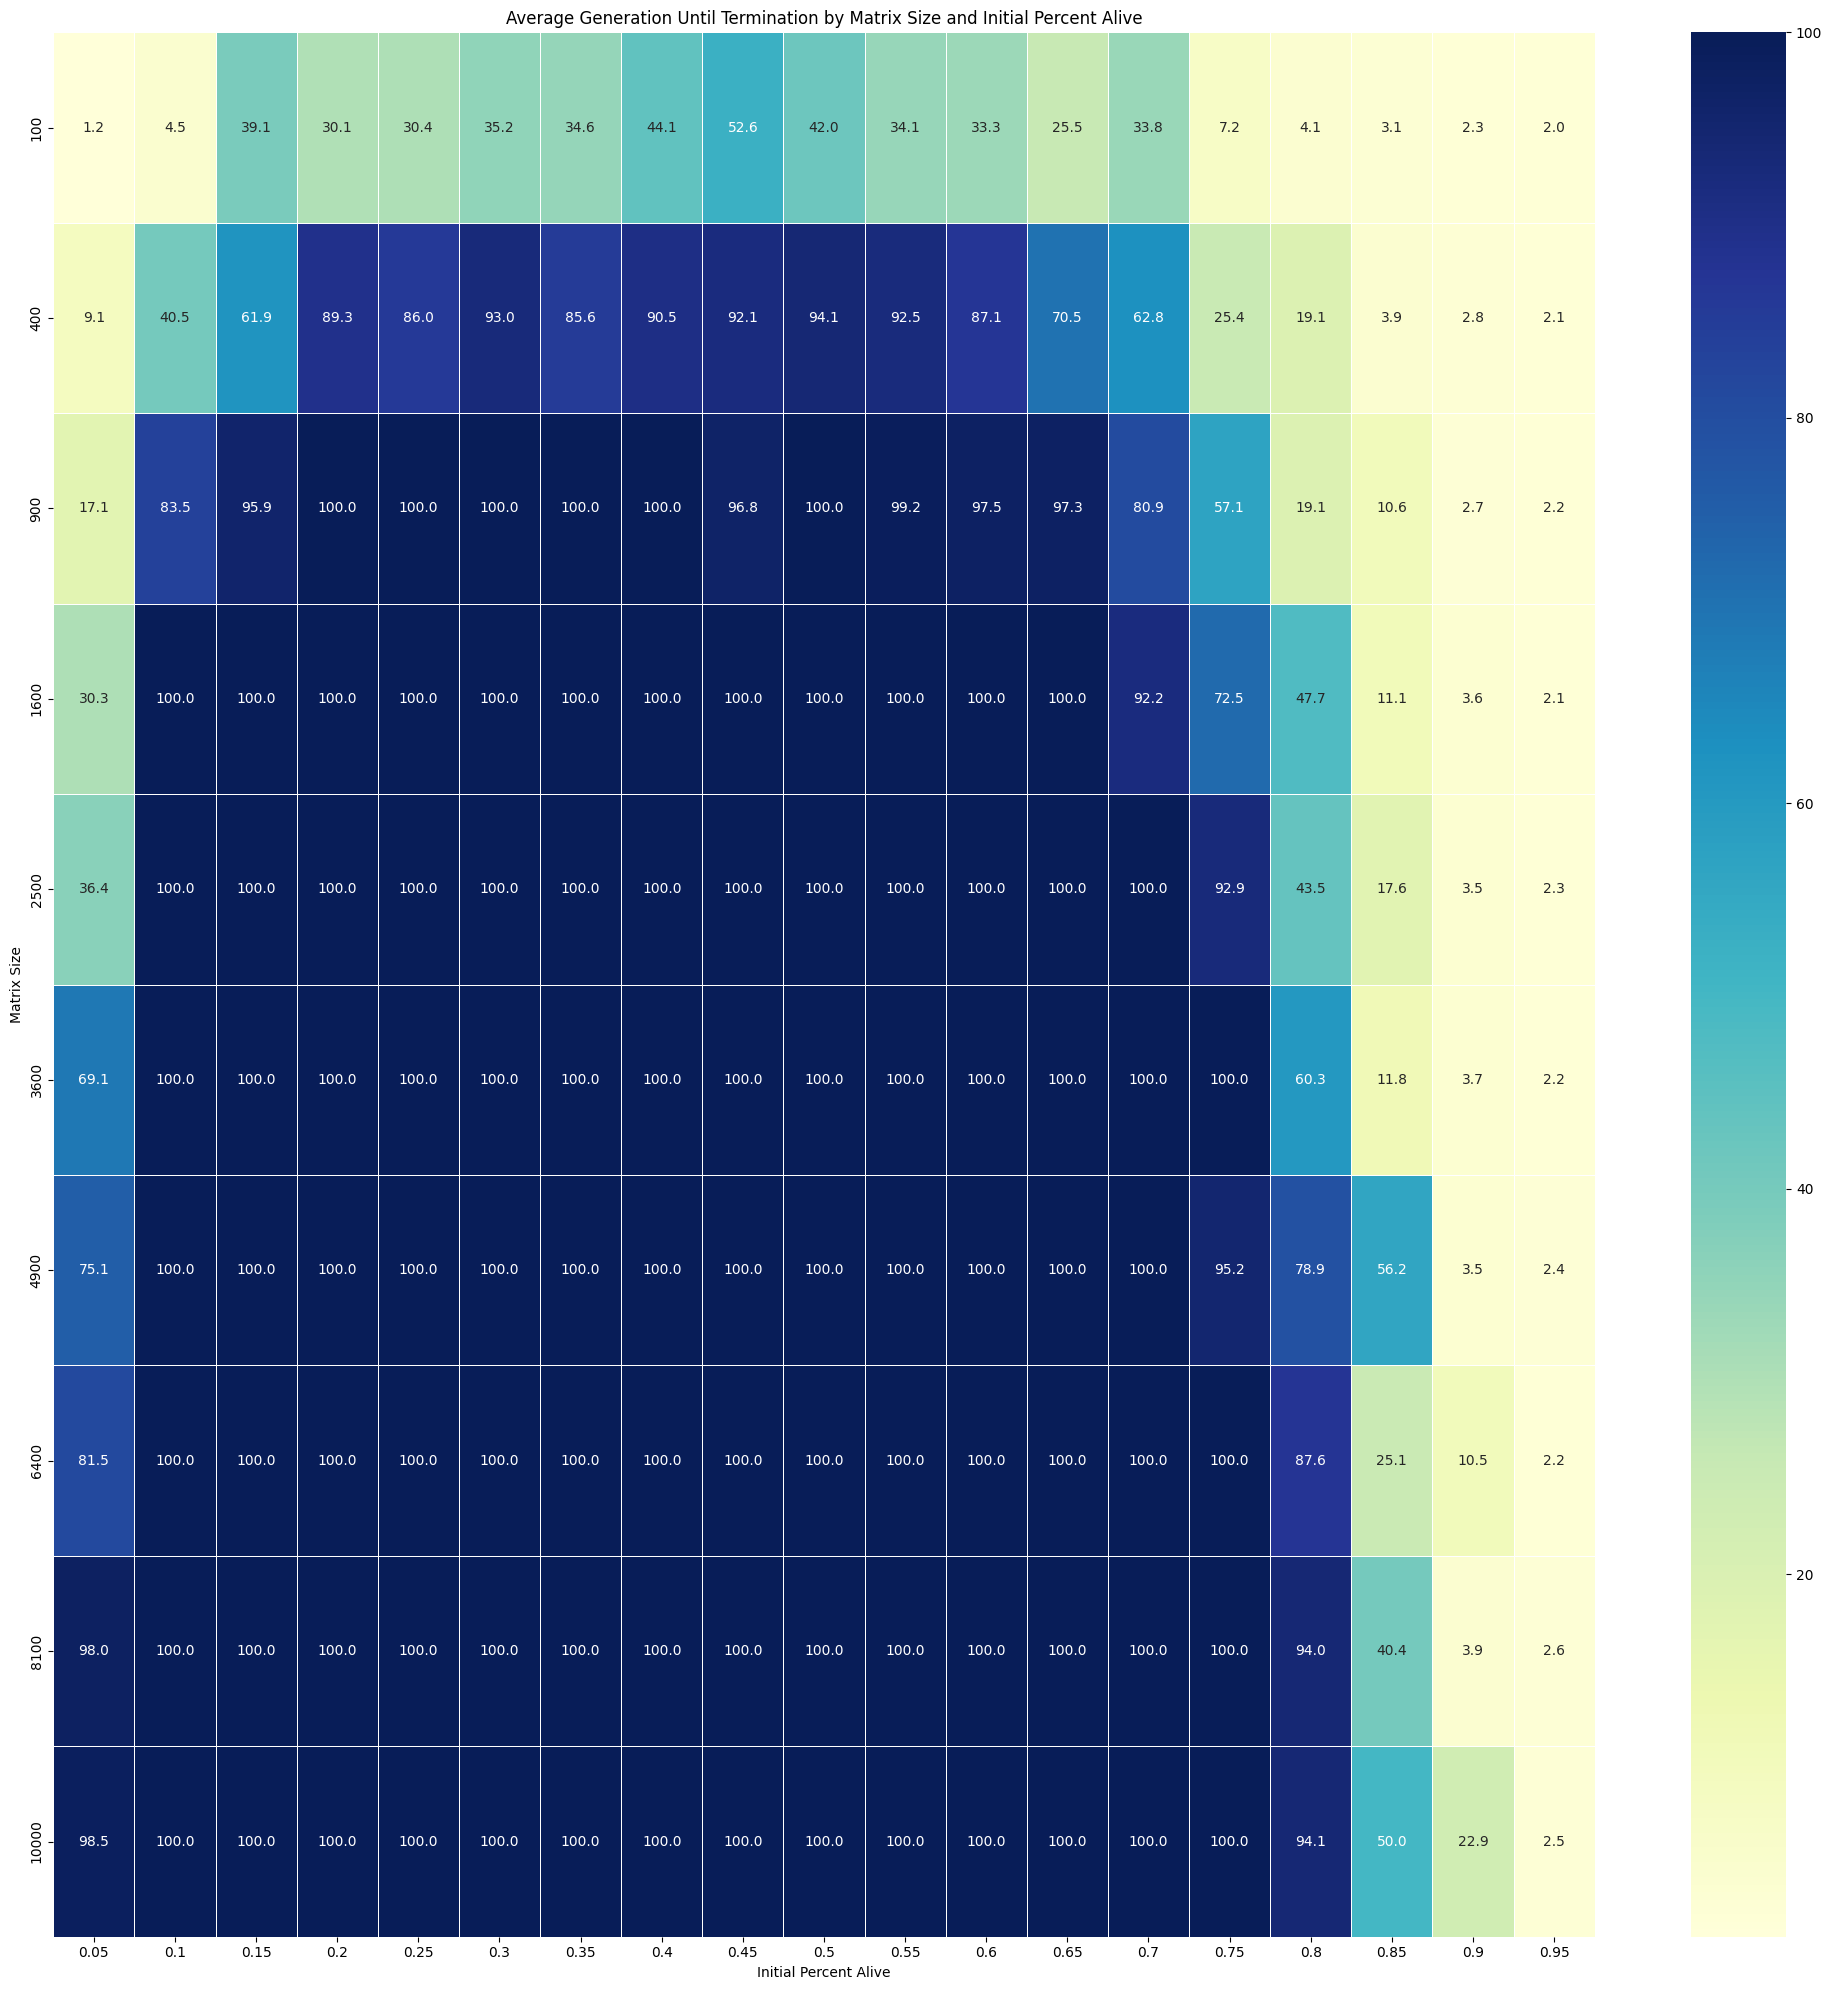

In [7]:
show_heat_map(sample_output)

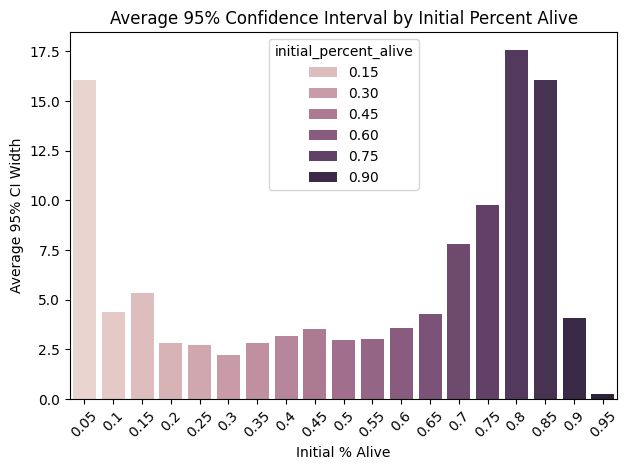

In [17]:
show_initial_percent_alive_ci_avg(sample_output)

In [9]:
required_sample_size_dict= required_n_per_group(sample_output_group_stats,15)
print(required_sample_size_dict)

{(4900, 0.85): 109, (10000, 0.85): 108, (900, 0.75): 104, (2500, 0.05): 100, (1600, 0.8): 97, (3600, 0.05): 95, (100, 0.15): 94, (3600, 0.8): 93, (8100, 0.85): 92, (400, 0.7): 89, (1600, 0.05): 88, (100, 0.7): 85, (4900, 0.05): 84, (2500, 0.8): 84, (400, 0.1): 81, (1600, 0.75): 79, (10000, 0.9): 74, (400, 0.15): 73, (6400, 0.85): 70, (400, 0.75): 69, (6400, 0.05): 68, (4900, 0.8): 67, (100, 0.5): 63, (100, 0.55): 60, (100, 0.45): 58, (400, 0.65): 55, (900, 0.05): 53, (2500, 0.85): 52, (900, 0.7): 52, (400, 0.8): 51, (900, 0.8): 50, (100, 0.4): 50, (6400, 0.8): 50, (100, 0.65): 49, (900, 0.1): 42, (100, 0.25): 40, (100, 0.6): 39, (100, 0.35): 39, (100, 0.2): 34, (400, 0.6): 34, (100, 0.3): 34, (400, 0.05): 30, (900, 0.85): 29, (6400, 0.9): 29, (1600, 0.85): 28, (3600, 0.85): 28, (400, 0.4): 27, (400, 0.2): 26, (2500, 0.75): 26, (8100, 0.8): 25, (10000, 0.8): 25, (400, 0.35): 23, (1600, 0.7): 20, (400, 0.25): 19, (4900, 0.75): 16, (400, 0.5): 15, (400, 0.45): 15, (400, 0.55): 15, (400, 0

In [10]:

final_output = final_run(required_sample_size_dict,max_steps=101)

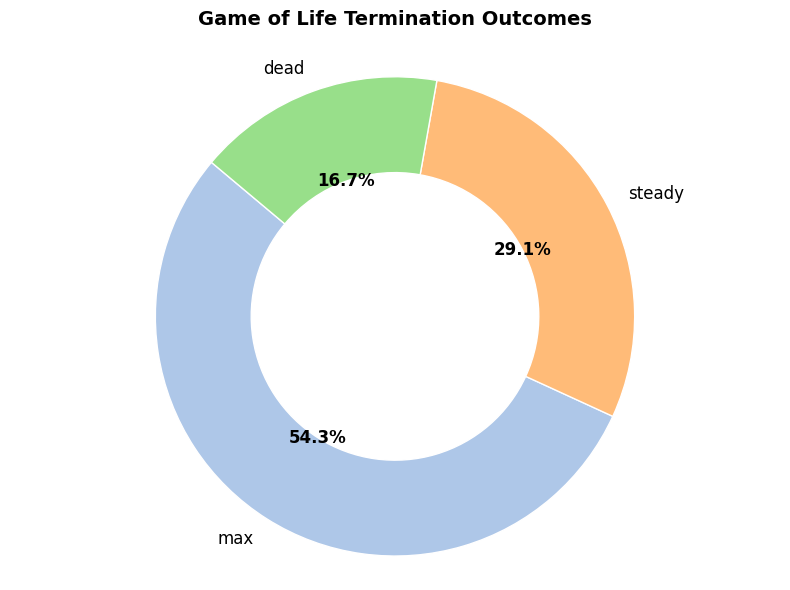

In [11]:
show_end_state_circle_chart(final_output)

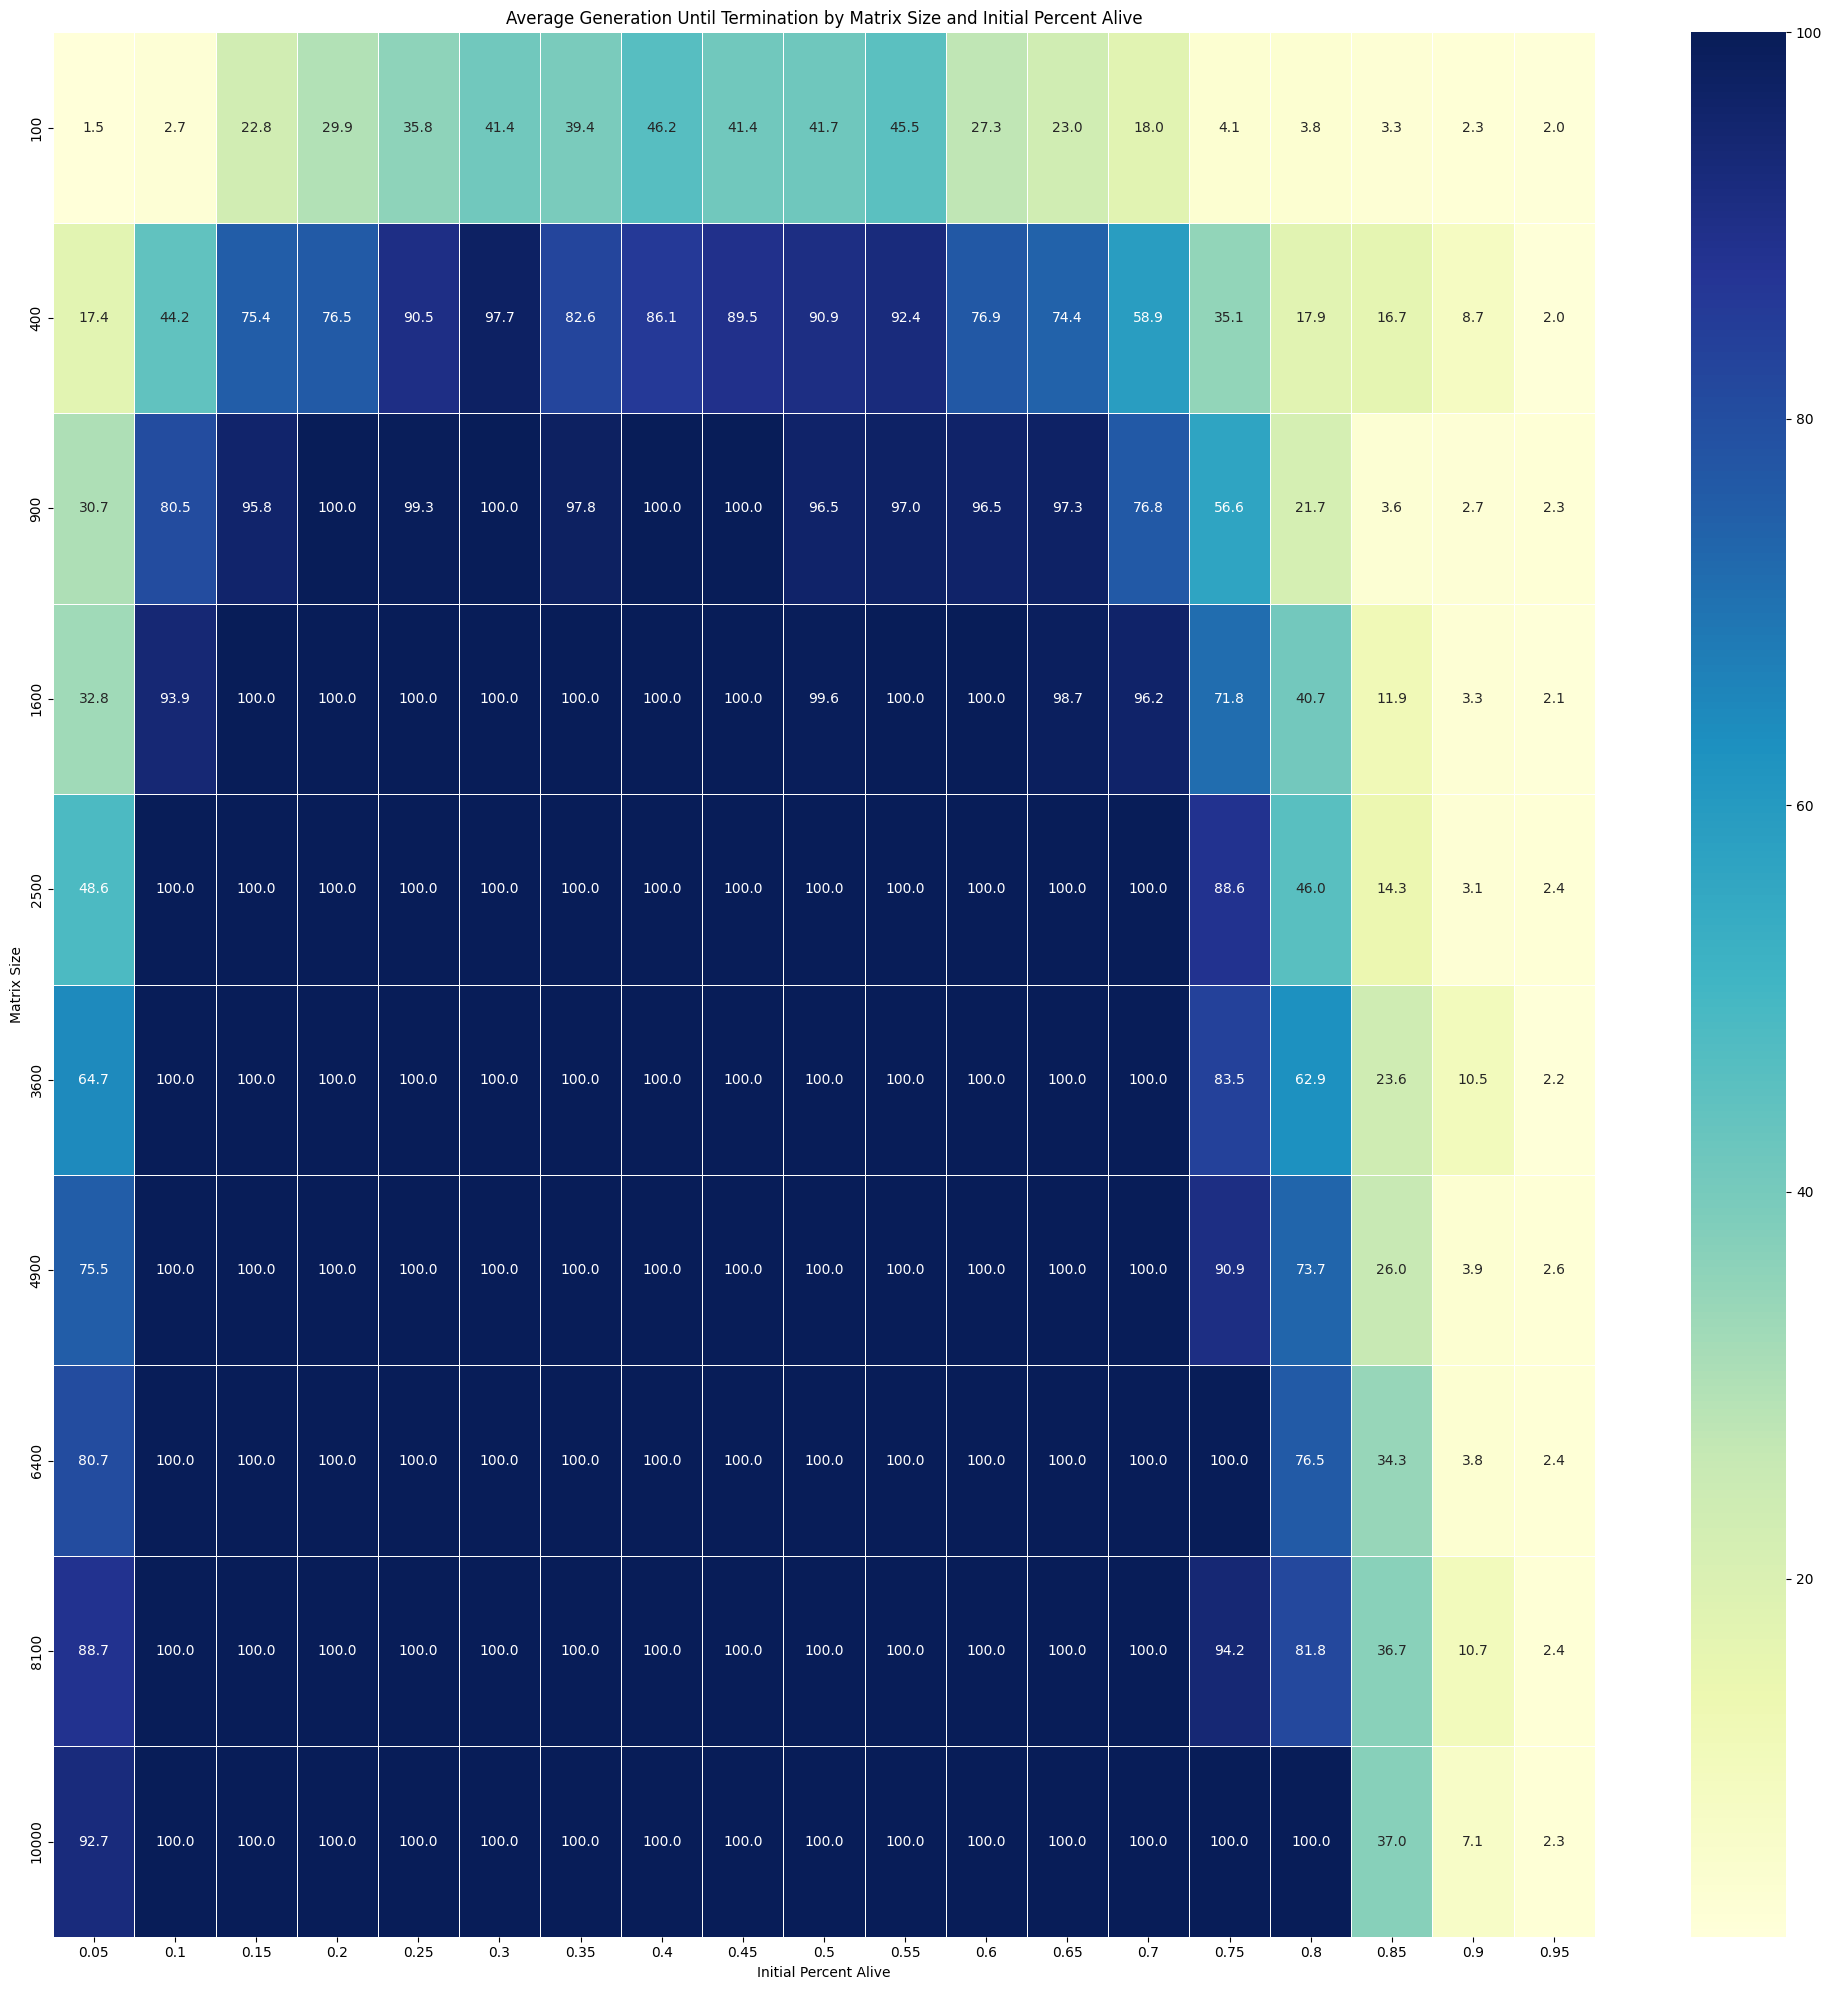

In [18]:
show_heat_map(final_output)

In [13]:
final_output_group_stats= calc_matrix_size_and_initial_percent_alive_group_stats(final_output)
final_output_group_stats.sort_values(["ci_95"],ascending=False).head(25)

,matrix_size,initial_percent_alive,gen_mean,gen_std,n,gen_standard_error,ci_95
109,3600,0.75,83.533333,34.182006,15,8.825756,18.929364
35,400,0.85,16.733333,33.862045,15,8.743142,18.752176
152,8100,0.05,88.733333,29.833985,15,7.703102,16.521510
167,8100,0.80,81.840000,37.072766,25,7.414553,15.302886
111,3600,0.85,23.571429,36.457412,28,6.889803,14.136708
36,400,0.90,8.733333,25.251497,15,6.519908,13.983813
128,4900,0.75,90.875000,25.785978,16,6.446495,13.740378
112,3600,0.90,10.533333,24.790167,15,6.400794,13.728337
169,8100,0.90,10.666667,24.740559,15,6.387985,13.700865
171,10000,0.05,92.666667,24.327136,15,6.281239,13.471919


In [14]:
sample_v_final_comparison =sample_v_final_stat_comparison(sample_output_group_stats,final_output_group_stats)

In [27]:
sample_v_final_comparison

,matrix_size,initial_percent_alive,sample_gen_mean,sample_gen_std,sample_gen_n,sample_gen_standard_error,sample_gen_ci_95,final_gen_mean,final_gen_std,final_gen_n,final_gen_standard_error,final_gen_ci_95,mean_delta,std_delta,standard_error_delta,ci_delta
0,4900,0.85,56.200000,48.478567,15,12.517112,26.846535,25.990826,38.092357,109,3.648586,7.232131,30.209174,10.386209,8.868526,19.614405
1,10000,0.85,50.000000,48.429625,15,12.504475,26.819432,36.981481,42.805577,108,4.118969,8.165375,13.018519,5.624048,8.385507,18.654058
2,900,0.75,57.066667,47.522125,15,12.270160,26.316876,56.567308,44.491248,104,4.362726,8.652438,0.499359,3.030877,7.907434,17.664438
3,2500,0.05,36.400000,46.582952,15,12.027667,25.796779,48.570000,46.892367,100,4.689237,9.304463,-12.170000,-0.309414,7.338430,16.492316
4,1600,0.80,47.733333,45.731306,15,11.807773,25.325153,40.742268,44.414308,97,4.509590,8.951465,6.991065,1.316998,7.298183,16.373688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,10000,0.50,100.000000,0.000000,15,0.000000,0.000000,100.000000,0.000000,15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
186,10000,0.55,100.000000,0.000000,15,0.000000,0.000000,100.000000,0.000000,15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
187,10000,0.60,100.000000,0.000000,15,0.000000,0.000000,100.000000,0.000000,15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
188,10000,0.65,100.000000,0.000000,15,0.000000,0.000000,100.000000,0.000000,15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


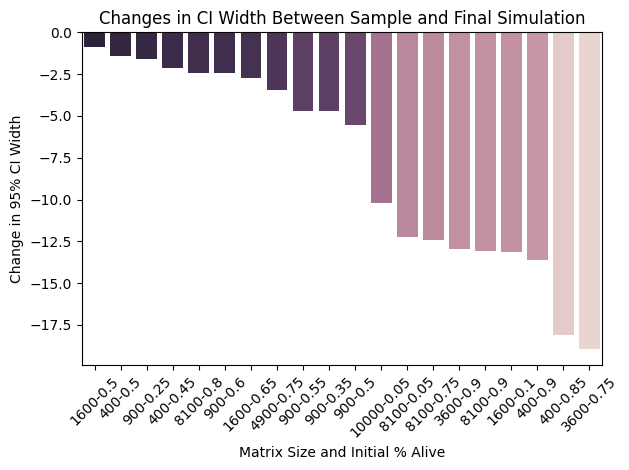

In [30]:
show_ci_delta(sample_v_final_comparison,"bottom",20)

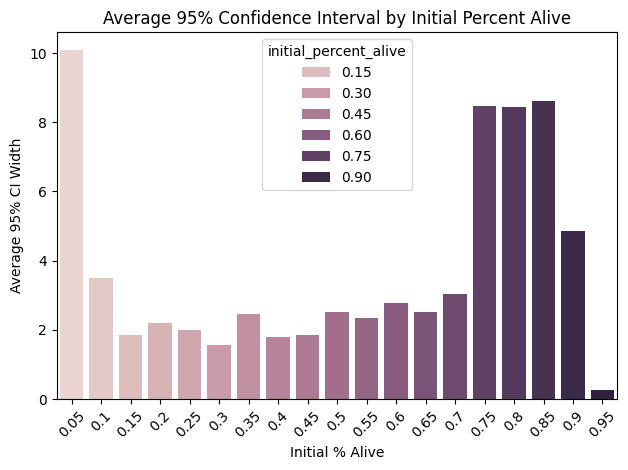

In [21]:
show_initial_percent_alive_ci_avg(final_output)

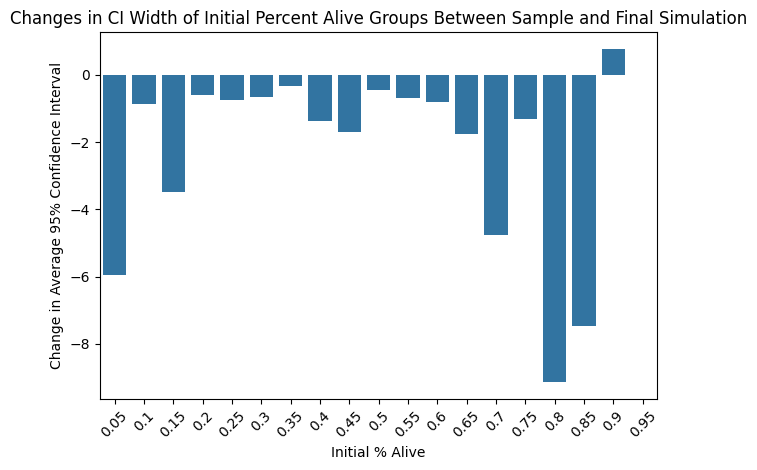

,initial_percent_alive,final_ci,sample_ci,difference_between_cis
0,0.05,10.092687,16.043024,-5.950337
1,0.10,3.488797,4.365043,-0.876247
2,0.15,1.848799,5.318442,-3.469643
3,0.20,2.199147,2.798853,-0.599706
4,0.25,1.992303,2.742662,-0.750359
5,0.30,1.569864,2.240520,-0.670656
6,0.35,2.470506,2.804497,-0.333992
7,0.40,1.792629,3.158123,-1.365494
8,0.45,1.838226,3.535799,-1.697573
9,0.50,2.520128,2.959051,-0.438923


In [54]:
difference_in_average_ci_percent_alive_groups(sample_output,final_output)

In [55]:
anova_analysis(final_output)

,matrix_size,f_stat,p_value,cohen_f
0,100,10.549685,6.842715e-27,0.509680
1,400,22.478918,4.603250e-57,0.781209
2,900,33.332789,4.450003e-74,1.088922
3,1600,31.326997,2.137585e-70,1.058794
4,2500,32.573079,7.077049e-71,1.119290
5,3600,20.284677,6.823131e-47,0.914070
6,4900,33.864864,8.833038e-74,1.124572
7,6400,38.649091,1.255950e-77,1.282436
8,8100,34.413159,1.677535e-66,1.324681
9,10000,73.917820,6.509026e-119,1.763149
